# **Identify red blood cells in image data using the opencv library**

UTS Teknik Data Mining 2 (Praktik)

Intan Amelia Sari - 2019104596

### Import Library

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

### Import data menggunakan cv2

In [ ]:
# Read Data
image = cv2.imread("redbloodcell.png")
(cv2.COLOR_BGR2RGB)

4

### Mengubah original image menjadi Grayscale

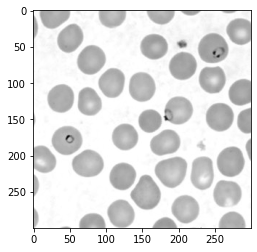

In [ ]:
#Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imwrite('gray.png', gray)
plt.imshow(gray, cmap='gray')

### Memperjelas object sel darah merah

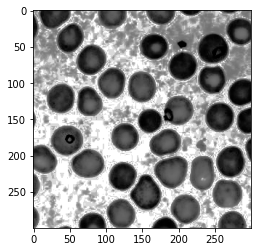

In [ ]:
# HistoNorm 
histoNorm = cv2.equalizeHist(gray)
cv2.imwrite('histoNorm.png', histoNorm)
plt.imshow(histoNorm, cmap='gray')

### Memetakan setiap intensitas yang ada

In [ ]:
def pixelVal(pix, r1, s1, r2, s2):
    if (0 <= pix and pix <= r1):
        return (s1 / r1) * pix
    elif (r1 < pix and pix <= r2):
        return ((s2 - s1) / (r2 - r1)) * (pix - r1) + s1
    else:
        return ((255 - s2) / (255 - r2)) * (pix - r2) + s2

### Men-define parameter

In [ ]:
r1 = 70
s1 = 0
r2 = 200
s2 = 255

### Menyamarkan gambar menggunakan Canny Detection sehingga yang terlihat hanya tepinya

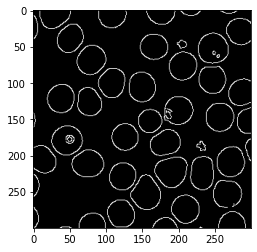

In [ ]:
# Canny Detection 
canny = cv2.Canny(gray, 60, 160, 3)
cv2.imwrite('edge.png', canny)

plt.imshow(canny, cmap='gray')

### Mempertajam tepi object sel darah dari image Canny Detection

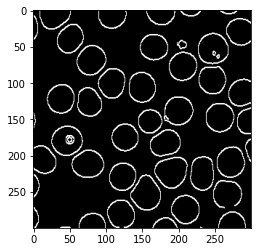

In [ ]:
# Dilated 
dilated = cv2.dilate(canny, (1,1), iterations=1)
plt.imshow(dilated, cmap='gray')

### Menghitung jumlah sel darah merah

In [ ]:
(cnt, hierarchy) = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print("Jumlah sel darah merah yaitu sebanyak", len(cnt),"Sel.")

Jumlah sel darah merah yaitu sebanyak 46 Sel.


### Visualisasi contour sel darah merah  

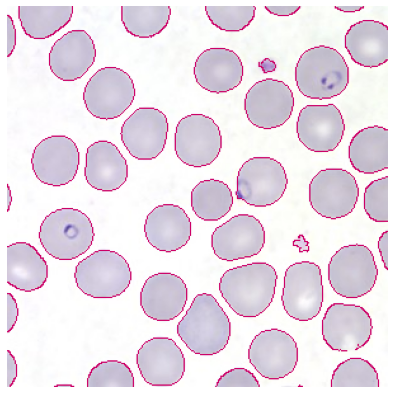

In [ ]:
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (204, 0, 102), 1)
fig,ax = plt.subplots(ncols=1, figsize=(10, 7))
ax.imshow(rgb);
ax.axis("off");

### Conclusion : dengan menggunakan opencv kita dapat mengidentifikasi jumlah sel darah merah yang terdapat pada data image. Untuk data image yang digunakan pada analisis kali ini ditemukan sebanyak 46 sel darah merah. Analisis kali ini saya menggunakan Grayscale, HistoNorm, Canny Detection, dan Dilated, setelah itu menghitung dan mem-visualisasikan contour dari sel darah merah agar dapat dihitung dan dilihat secara jelas